In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Santander Customer Satisfaction\train.csv')

In [3]:
print(data.shape)
data.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
[col for col in data.columns if data[col].isnull().sum() > 0]

[]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['ID','TARGET'],axis = 1),data['TARGET'],test_size = 0.3,random_state = 0)

In [8]:
print(X_train.shape,X_test.shape)

(53214, 369) (22806, 369)


In [9]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

### Constant features

In [10]:
#removing const features
const = [col for col in X_train.columns if len(X_train[col].unique()) == 1]
len(const)

38

In [11]:
X_train.drop(const,axis = 1,inplace = True)
X_test.drop(const,axis = 1,inplace = True)

In [12]:
print(X_train.shape,X_test.shape)

(53214, 331) (22806, 331)


### Quasi const features

In [13]:
quasi_const = [col for col in X_train.columns if (X_train[col].value_counts() / len(X_train)).values[0] > 0.9998]
len(quasi_const)

70

In [14]:
X_train.drop(quasi_const,axis = 1,inplace = True)
X_test.drop(quasi_const,axis = 1,inplace = True)

In [15]:
print(X_train.shape,X_test.shape)

(53214, 261) (22806, 261)


### Dublicative features

In [16]:
dub_features = []
tick = 0
for i in range(len(X_train.columns)):
    tick += 1
    print((tick / len(X_train.columns))*100)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            dub_features.append(col_2)

0.38314176245210724
0.7662835249042145
1.1494252873563218
1.532567049808429
1.9157088122605364
2.2988505747126435
2.681992337164751
3.065134099616858
3.4482758620689653
3.8314176245210727
4.21455938697318
4.597701149425287
4.980842911877394
5.363984674329502
5.747126436781609
6.130268199233716
6.513409961685824
6.896551724137931
7.2796934865900385
7.662835249042145
8.045977011494253
8.42911877394636
8.812260536398467
9.195402298850574
9.578544061302683
9.961685823754788
10.344827586206897
10.727969348659004
11.11111111111111
11.494252873563218
11.877394636015326
12.260536398467432
12.643678160919542
13.026819923371647
13.409961685823754
13.793103448275861
14.17624521072797
14.559386973180077
14.942528735632186
15.32567049808429
15.708812260536398
16.091954022988507
16.47509578544061
16.85823754789272
17.24137931034483
17.624521072796934
18.007662835249043
18.39080459770115
18.773946360153257
19.157088122605366
19.54022988505747
19.923371647509576
20.306513409961685
20.689655172413794
2

In [17]:
dub_features = list(set(dub_features))
len(dub_features)

12

In [18]:
X_train.drop(dub_features,axis = 1,inplace = True)
X_test.drop(dub_features,axis = 1,inplace = True)

In [19]:
print(X_train.shape,X_test.shape)

(53214, 249) (22806, 249)


In [20]:
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

## Remove Crrelated feature

In [21]:
def correlation(data,threshold):
    corr_features = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            col_2 = data.columns[j]
            if corr_matrix.iloc[i][j] >threshold:
                corr_features.add(data.columns[i])
    return corr_features            

In [22]:
corr_features = correlation(X_train,0.8)
len(corr_features)

140

In [23]:
X_train.drop(corr_features,axis = 1,inplace = True)
X_test.drop(corr_features,axis = 1,inplace = True)

In [24]:
print(X_train.shape,X_test.shape)

(53214, 109) (22806, 109)


In [25]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

## Univariate test using ROC_AUC

In [26]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(),y_train)
    pos_prob = clf.predict_proba(X_test[feature].to_frame())
    roc = roc_auc_score(y_test,pos_prob[:,1])
    roc_values.append(roc)
    

In [27]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False)

var15                        0.697065
num_var4                     0.696372
ind_var5                     0.663066
saldo_var30                  0.657865
saldo_var5                   0.656267
saldo_medio_var5_hace2       0.649150
var36                        0.648116
saldo_medio_var5_hace3       0.647765
num_var30_0                  0.540032
ind_var12_0                  0.527923
ind_var39_0                  0.527372
ind_var13_0                  0.524055
saldo_var12                  0.519468
ind_var8_0                   0.519047
num_var45_hace3              0.518231
saldo_var13_corto            0.517414
ind_var5_0                   0.514479
num_var22_ult1               0.514352
delta_imp_aport_var13_1y3    0.512962
num_med_var45_ult3           0.512698
num_var22_hace3              0.511082
num_var43_emit_ult1          0.511045
num_aport_var13_hace3        0.510760
imp_aport_var13_hace3        0.510517
num_var22_ult3               0.510465
num_var43_recib_ult1         0.509813
ind_var43_re

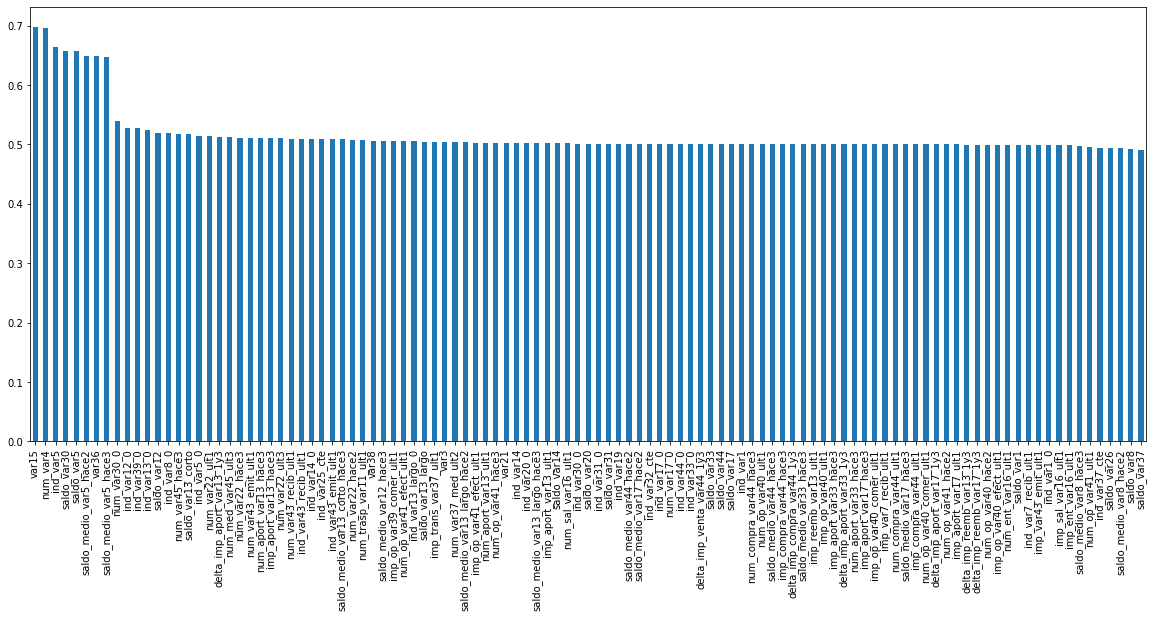

In [28]:
roc_values.sort_values(ascending = False).plot.bar(figsize = (20,8))

In [29]:
vars = roc_values[roc_values<=0.5].index

In [30]:
len(vars)

21

In [31]:
X_train.drop(vars,axis = 1,inplace = True)
X_test.drop(vars,axis = 1,inplace = True)

In [32]:
print(X_train.shape,X_test.shape)

(53214, 88) (22806, 88)


In [33]:
print(X_train_orig.shape,X_test_orig.shape)

(53214, 369) (22806, 369)


In [35]:
print(X_train_basic_filter.shape,X_test_basic_filter.shape)

(53214, 249) (22806, 249)


In [36]:
print(X_train_corr.shape,X_test_corr.shape)

(53214, 109) (22806, 109)


In [37]:
print(X_train.shape,X_test.shape)

(53214, 88) (22806, 88)


## Compare the performace in machine learning algorithms

In [44]:
def run_random_forests(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=200,random_state=39,max_depth=4)
    clf.fit(X_train,y_train)
    print('Train Set')
    pred = clf.predict_proba(X_train)
    print('The roc_auc value for RandomForest {}'.format(roc_auc_score(y_train,pred[:,1])))
    print('Test set')
    pred = clf.predict_proba(X_test)
    print('The roc_auc value for RandomForest {}'.format(roc_auc_score(y_test,pred[:,1])))

In [45]:
#original
run_random_forests(X_train_orig,X_test_orig,y_train,y_test)

Train Set
The roc_auc value for RandomForest 0.8012314741948454
Test set
The roc_auc value for RandomForest 0.7900499757912425


In [46]:
#filter_method - basic
run_random_forests(X_train_basic_filter,X_test_basic_filter,y_train,y_test)

Train Set
The roc_auc value for RandomForest 0.8029311054163247
Test set
The roc_auc value for RandomForest 0.7926447707684552


In [47]:
#filter_method - correlation
run_random_forests(X_train_corr,X_test_corr,y_train,y_test)

Train Set
The roc_auc value for RandomForest 0.805372829142957
Test set
The roc_auc value for RandomForest 0.7944695483417501


In [48]:
#filter_method - final
run_random_forests(X_train,X_test,y_train,y_test)

Train Set
The roc_auc value for RandomForest 0.8075822726606909
Test set
The roc_auc value for RandomForest 0.7949713652979556


In [49]:
# Even after removing the number of features from 371 to 88, there is no real change in the performance

In [53]:
#analyzing for logistic regresion
def run_logistic_regression(X_train,X_test,y_train,y_test):
    clf = LogisticRegression(random_state = 44)
    clf.fit(X_train,y_train)
    print('Train Set')
    pred = clf.predict_proba(X_train)
    print('The roc-auc value for Logistic Regression is {}'.format(roc_auc_score(y_train,pred[:,1])))
    print('Test Set')
    pred = clf.predict_proba(X_test)
    print('The roc-auc value for Logistic Regression is {}'.format(roc_auc_score(y_test,pred[:,1])))
    
    

In [62]:
#original
scaler = StandardScaler().fit(X_train_orig)

run_logistic_regression(scaler.transform(X_train_orig)
                        ,scaler.transform(X_test_orig)
                        ,y_train,y_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Set
The roc-auc value for Logistic Regression is 0.8069992623682241
Test Set
The roc-auc value for Logistic Regression is 0.7936268147072499


In [64]:
#filter_method - basic
scaler = StandardScaler().fit(X_train_basic_filter)

run_logistic_regression(scaler.transform(X_train_basic_filter),
                        scaler.transform(X_test_basic_filter)
                        ,y_train,y_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Set
The roc-auc value for Logistic Regression is 0.8069980946380821
Test Set
The roc-auc value for Logistic Regression is 0.7936745425424433


In [65]:
#filter_method - corr
scaler = StandardScaler().fit(X_train_corr)

run_logistic_regression(scaler.transform(X_train_corr),
                        scaler.transform(X_test_corr),y_train,y_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Set
The roc-auc value for Logistic Regression is 0.79826719122973
Test Set
The roc-auc value for Logistic Regression is 0.7925108079807738


In [66]:
#filter_method - final
scaler = StandardScaler().fit(X_train)

run_logistic_regression(scaler.transform(X_train),
                        scaler.transform(X_test)
                        ,y_train,y_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Set
The roc-auc value for Logistic Regression is 0.7944186329373887
Test Set
The roc-auc value for Logistic Regression is 0.7941944261085152


In [68]:
#in logistic regression too, the performance of the model is not really effected by shrinking the number of features